<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/Stationary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

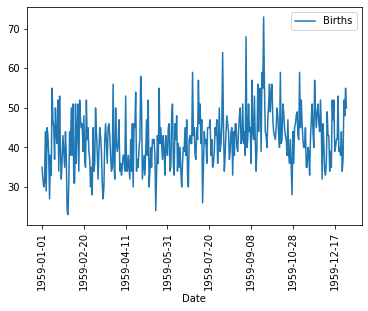

In [4]:
import pandas as pd
from matplotlib import pyplot
fb=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv')
fb1=fb.set_index('Date')
fb1.plot()
pyplot.xticks(rotation=90)
pyplot.show()


In [7]:
fb1

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


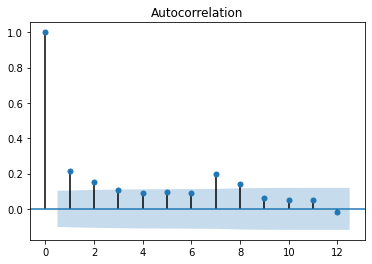

In [8]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

#plot autocorrelation function
fig = tsaplots.plot_acf(fb1, lags=12)
plt.show()

In [9]:
#testing for Stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(fb1['Births'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


Ho:Series is not stationary

Ha:Series is stationary 

If significance level(alpha) is 5%, what is the decision?

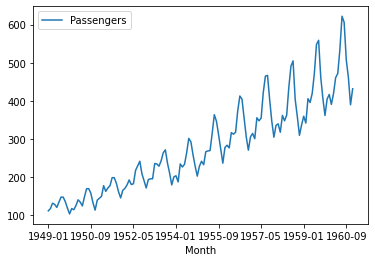

In [10]:
import pandas as pd
from matplotlib import pyplot
ap=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
ap1=ap.set_index('Month')
ap1.plot()
pyplot.show()


In [11]:
ap1

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


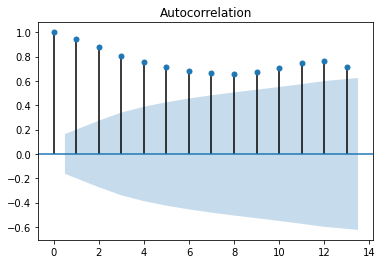

In [12]:
fig = tsaplots.plot_acf(ap1, lags=13)
plt.show()

In [13]:
#Testing for Stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(ap1['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Ho:Series is not stationary

Ha:Series is stationary

If significance level(alpha) is 5%, what is the decision?

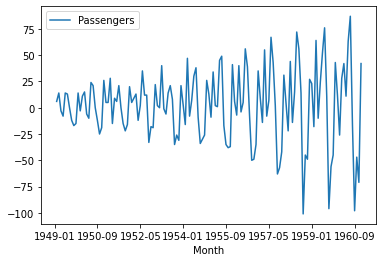

In [14]:
#Take differnce for making stationary
dap = ap1 - ap1.shift(1)
dap.plot()

In [15]:
dap

,Passengers
Month,
1949-01,NaN
1949-02,6.0
1949-03,14.0
1949-04,-3.0
1949-05,-8.0
...,...
1960-08,-16.0
1960-09,-98.0
1960-10,-47.0


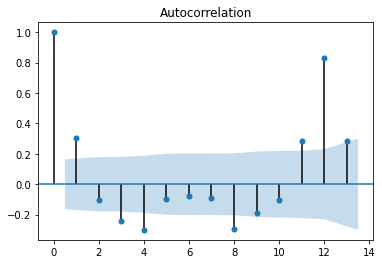

In [16]:
dap=dap.dropna()
fig = tsaplots.plot_acf(dap, lags=13)
plt.show()

Q:Is there a seasonality in the data?

In [17]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(dap['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [ ]:
Ho:Series is not stationary

Ha:Series is stationary

If significance level(alpha) is 5%, what is the decision?

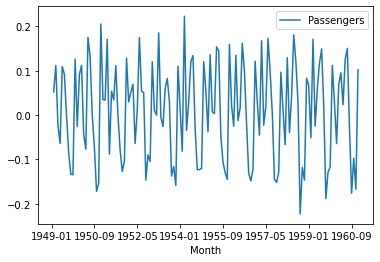

In [18]:
import numpy as np
dap2 = np.log(ap1) - np.log(ap1.shift(1))
dap2.plot()

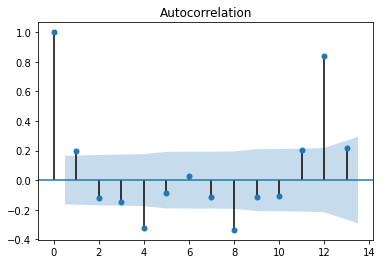

In [19]:
dap2=dap2.dropna()
fig = tsaplots.plot_acf(dap2, lags=13)
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(dap2['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.717131
p-value: 0.071121
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579
